In [1]:
%load_ext autoreload
%autoreload 2

### Local LRM loading

In [13]:
!cat $TORCH_HOME

cat: /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache: Is a directory


In [6]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub

checkpoints
harvard-visionlab_lrm-steering_main
set14_alexnet_lrm_cls6to8_9to0_2steps_stepwise_final_weights-40b29a3427.pth
set15_alexnet_torchvision_imagenet1k_lrm_2back_2steps_final_weights-17b4229a30.pth
set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
trusted_list


In [17]:
# localpath = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth"

In [23]:
!ls {lrm_repo_path}

hubconf.py  __init__.py  lrm_models   __pycache__
images	    LICENSE	 neurips2023  README.md


In [24]:
import re
import os
from os.path import join
TORCH_HOME = os.environ["TORCH_HOME"]
weight_urls = {
    "alexnet_lrm1": "https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set14/set14_alexnet_lrm_cls6to8_9to0_2steps_stepwise/df5a9767-1046-4d0f-9f82-649c0e5c7881/set14_alexnet_lrm_cls6to8_9to0_2steps_stepwise_final_weights-40b29a3427.pth",
    "alexnet_lrm2": "https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set15/set15_alexnet_torchvision_imagenet1k_lrm_2back_2steps/84bdc4f4-1de0-4438-941b-43e574298694/set15_alexnet_torchvision_imagenet1k_lrm_2back_2steps_final_weights-17b4229a30.pth",
    "alexnet_lrm3": "https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set15/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps/28453e80-c5e5-4d76-bc81-99c5fade39ff/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth",
}
weight_paths = {
    "alexnet_lrm1": join(TORCH_HOME, "hub", "set14_alexnet_lrm_cls6to8_9to0_2steps_stepwise_final_weights-40b29a3427.pth",),
    "alexnet_lrm2": join(TORCH_HOME, "hub", "set15_alexnet_torchvision_imagenet1k_lrm_2back_2steps_final_weights-17b4229a30.pth",),
    "alexnet_lrm3": join(TORCH_HOME, "hub", "set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth",),
}

lrm_repo_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/harvard-visionlab_lrm-steering_main"

def format_state_dict(checkpoint):
    if 'model' in checkpoint:
        state_dict = checkpoint['model']
    elif 'state_dict' in checkpoint:
        state_dict = checkpoint['state_dict']
    else:
        state_dict = checkpoint
    state_dict = {k.replace("module.",""):v for k,v in state_dict.items()}
    # we renamed "backbone" to be "feedforward"
    state_dict = {k.replace("backbone.", "feedforward."):v for k,v in state_dict.items()}
    # we adjusted the lrm module nameing to replace "." with "_" in layer names (instead of just trimming the .)
    pattern = re.compile(r"features(\d+)")
    state_dict = {pattern.sub(lambda m: f"features_{m.group(1)}", k):v for k,v in state_dict.items()}
    return state_dict

In [21]:
import torch
model, transforms = torch.hub.load(lrm_repo_path, 'alexnet_lrm3', source='local',
                        pretrained=False, steering=True, force_reload=True)
model.load_state_dict(format_state_dict(torch.load(weight_paths["alexnet_lrm3"])))

<All keys matched successfully>

In [22]:
import torch
model, transforms = torch.hub.load('harvard-visionlab/lrm-steering', 'alexnet_lrm3', 
                                   pretrained=False, steering=True, force_reload=True)
model.load_state_dict(format_state_dict(torch.load(weight_paths["alexnet_lrm3"])))

Downloading: "https://github.com/harvard-visionlab/lrm-steering/zipball/main" to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/main.zip


In [31]:
model

SteerableLRM(
  (feedforward): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False

In [2]:
import torch
model, transforms = torch.hub.load('harvard-visionlab/lrm-steering', 'alexnet_lrm3', pretrained=True, steering=True, force_reload=True)
print(model)

Downloading: "https://github.com/harvard-visionlab/lrm-steering/zipball/main" to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/main.zip


==> Loading weights for alexnet_lrm3, hash_id=63ab1b3b06
https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set15/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps/28453e80-c5e5-4d76-bc81-99c5fade39ff/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
local_filename: /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
<All keys matched successfully>
SteerableLRM(
  (feedforward): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 38

### Load LRN models

In [2]:
import torch
model, transforms = torch.hub.load('harvard-visionlab/lrm-steering', 'alexnet_lrm3', pretrained=True, steering=True, force_reload=True)
print(model)

Downloading: "https://github.com/harvard-visionlab/lrm-steering/zipball/main" to /n/holylabs/LABS/kempner_fellows/Users/binxuwang/torch_cache/hub/main.zip


==> Loading weights for alexnet_lrm3, hash_id=63ab1b3b06
https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set15/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps/28453e80-c5e5-4d76-bc81-99c5fade39ff/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
local_filename: /n/holylabs/LABS/kempner_fellows/Users/binxuwang/torch_cache/hub/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
<All keys matched successfully>
SteerableLRM(
  (feedforward): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_

### Model structure

https://github.com/Animadversio/lrm-steering/blob/dc13437c3b7db9ee293c7637303448ea9e13150b/lrm_models/lrmnet.py#L56

Notes
* `LongRangeModulation`, '''forward pass of lrm modules doesn't get called'''


```python
# we need to know current output size to adaptively resize in ModBlock
target_size = output.shape[-2:] if len(output.shape)==4 else 1

# calculate long-range modulation to apply to output (sum across sources)
total_mod = torch.zeros_like(output)
for module in self:
    if hasattr(module, 'name',) and module.name in self.mod_inputs:
        source_activation = self.mod_inputs[module.name]

        mod = module(source_activation, target_size=target_size)

        total_mod = total_mod + mod
    
    # pass through identity module so total_mod can be read out
    self.total_mod(total_mod)

# apply the modulation (x = x + x * f)
output = output + output * total_mod

# pass through identity module modulated output can be readout
self.post_mod_output(output)

# activation
output = F.relu(output, inplace=False)
```

In [13]:
model.forward_passes

2

## Evolution utils

In [6]:
""" Cluster version of BigGAN Evol """
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
import tqdm
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pylab as plt
import torch
import torch.nn.functional as F
from torchvision.transforms import ToPILImage, ToTensor
from torchvision.utils import make_grid
from pytorch_pretrained_biggan import (BigGAN, truncated_noise_sample, one_hot_from_names, save_as_images)
from core.utils.CNN_scorers import TorchScorer
from core.utils.GAN_utils import BigGAN_wrapper, upconvGAN, loadBigGAN
from core.utils.grad_RF_estim import grad_RF_estimate, gradmap2RF_square
from core.utils.layer_hook_utils import get_module_names, layername_dict, register_hook_by_module_names, get_module_name_shapes
from core.utils.layer_hook_utils import featureFetcher, featureFetcher_module, featureFetcher_recurrent
from core.utils.Optimizers import CholeskyCMAES, HessCMAES, ZOHA_Sphere_lr_euclid
from core.utils.Optimizers import CholeskyCMAES, HessCMAES


### LRN playground hooks

In [5]:
get_module_name_shapes(model, [torch.rand(1, 3, 224, 224)],deepest=6);

------------------------------------------------------------------------------------------------------------------------------------------------------
      Layer Id                                           inshape                    outshape                            Type   Module Path                      
        0                                         (1, 3, 224, 224)            (1, 3, 224, 224)                         [Input]   Image                            
        1                                       [(1, 3, 224, 224)]             (1, 64, 55, 55)                        [Conv2d]   .feedforward.features.0          
        2                                        [(1, 64, 55, 55)]             (1, 64, 55, 55)                          [ReLU]   .feedforward.features.1          
        3                                        [(1, 64, 55, 55)]             (1, 64, 27, 27)                     [MaxPool2d]   .feedforward.features.2          
        4                           

In [ ]:
register_hook_by_module_names(".lrm.features_0_modulation.Identitypre_mod_output", )

In [20]:
fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
                         print_module=True, store_device="cuda", )

------------------------------------------------------------------------------
      Layer Id       inshape       outshape           Type                 ReadableStr 
        0        (3, 224, 224) (3, 224, 224)           Input                      Image
        1        (3, 224, 224) (64, 55, 55)          Conv2d  .feedforward.features.Conv2d0
        2        (64, 55, 55) (64, 55, 55)            ReLU  .feedforward.features.ReLU1
        3        (64, 55, 55) (64, 27, 27)       MaxPool2d  .feedforward.features.MaxPool2d2
        4        (64, 27, 27) (192, 27, 27)          Conv2d  .feedforward.features.Conv2d3
        5        (192, 27, 27) (192, 27, 27)            ReLU  .feedforward.features.ReLU4
        6        (192, 27, 27) (192, 13, 13)       MaxPool2d  .feedforward.features.MaxPool2d5
        7        (192, 13, 13) (384, 13, 13)          Conv2d  .feedforward.features.Conv2d6
        8        (384, 13, 13) (384, 13, 13)            ReLU  .feedforward.features.ReLU7
        9      

In [28]:
# fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
#                          print_module=True, store_device="cuda", )
fetcher.record(".lrm.features_0_modulation.Identitypost_mod_output",store_name="lrm_conv0_post_mod")
fetcher.record(".feedforward.features.Conv2d0",store_name="conv0_out")
fetcher.record(".lrm.features_8_modulation.Identitypost_mod_output",store_name="lrm_conv8_post_mod")
fetcher.record(".feedforward.features.Conv2d8",store_name="conv8_out")
fetcher.record(".feedforward.classifier.ReLU2",store_name="fc6_relu")
fetcher.record(".feedforward.classifier.ReLU5",store_name="fc7_relu")
fetcher.record(".feedforward.features.ReLU11", store_name="conv5_relu")

In [29]:
x = torch.rand(1, 3, 224, 224).to("cuda")
out1 = model(x, drop_state=True, forward_passes=1)
for k, v in fetcher.activations.items():
    print(k, v.shape)
out2 = model(x, drop_state=False, forward_passes=1)
for k, v in fetcher.activations.items():
    print(k, v.shape)
out3 = model(x, drop_state=False, forward_passes=1)
for k, v in fetcher.activations.items():
    print(k, v.shape)


lrm_conv8_post_mod torch.Size([2, 256, 15, 15])
conv8_out torch.Size([1, 256, 13, 13])
lrm_conv0_post_mod torch.Size([2, 64, 63, 63])
conv0_out torch.Size([1, 64, 55, 55])
lrm_conv8_post_mod torch.Size([1, 256, 13, 13])
conv8_out torch.Size([1, 256, 13, 13])
lrm_conv0_post_mod torch.Size([1, 64, 55, 55])
conv0_out torch.Size([1, 64, 55, 55])
lrm_conv8_post_mod torch.Size([1, 256, 13, 13])
conv8_out torch.Size([1, 256, 13, 13])
lrm_conv0_post_mod torch.Size([1, 64, 55, 55])
conv0_out torch.Size([1, 64, 55, 55])


In [34]:
torch.allclose(fetcher["conv0_out"], F.relu(fetcher["lrm_conv0_post_mod"]), atol=1e-5)

True

In [35]:
torch.allclose(fetcher["conv8_out"], F.relu(fetcher["lrm_conv8_post_mod"]), atol=1e-5)

True

In [27]:
fetcher.cleanup()

FeatureFetcher hooks all freed


In [26]:
fetcher["conv8_out"].shape

torch.Size([1, 256, 13, 13])

In [ ]:
fetcher.record(ingraph=True)

In [8]:
get_module_names(model, (3,224,224), "cpu")

------------------------------------------------------------------------------
      Layer Id       inshape       outshape           Type                 ReadableStr 
        0        (3, 224, 224) (3, 224, 224)           Input                      Image
        1        (3, 224, 224) (64, 55, 55)          Conv2d  .feedforward.features.Conv2d0
        2        (64, 55, 55) (64, 55, 55)            ReLU  .feedforward.features.ReLU1
        3        (64, 55, 55) (64, 27, 27)       MaxPool2d  .feedforward.features.MaxPool2d2
        4        (64, 27, 27) (192, 27, 27)          Conv2d  .feedforward.features.Conv2d3
        5        (192, 27, 27) (192, 27, 27)            ReLU  .feedforward.features.ReLU4
        6        (192, 27, 27) (192, 13, 13)       MaxPool2d  .feedforward.features.MaxPool2d5
        7        (192, 13, 13) (384, 13, 13)          Conv2d  .feedforward.features.Conv2d6
        8        (384, 13, 13) (384, 13, 13)            ReLU  .feedforward.features.ReLU7
        9      

(OrderedDict([('0', 'Image'),
              ('1', '.feedforward.features.Conv2d0'),
              ('2', '.feedforward.features.ReLU1'),
              ('3', '.feedforward.features.MaxPool2d2'),
              ('4', '.feedforward.features.Conv2d3'),
              ('5', '.feedforward.features.ReLU4'),
              ('6', '.feedforward.features.MaxPool2d5'),
              ('7', '.feedforward.features.Conv2d6'),
              ('8', '.feedforward.features.ReLU7'),
              ('9', '.feedforward.features.Conv2d8'),
              ('10', '.feedforward.features.ReLU9'),
              ('11', '.feedforward.features.Conv2d10'),
              ('12', '.feedforward.features.ReLU11'),
              ('13', '.feedforward.features.MaxPool2d12'),
              ('14', '.feedforward.features'),
              ('15', '.feedforward.AdaptiveAvgPool2davgpool'),
              ('16', '.feedforward.classifier.Dropout0'),
              ('17', '.feedforward.classifier.Linear1'),
              ('18', '.feedforward.cl

In [12]:
model

SteerableLRM(
  (feedforward): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False

### Evoution from LRN modulated output

In [9]:
def visualize_trajectory(scores_all, generations, codes_arr=None, show=False, title_str=""):
    """ Visualize the Score Trajectory """
    gen_slice = np.arange(min(generations), max(generations) + 1)
    AvgScore = np.zeros(gen_slice.shape)
    MaxScore = np.zeros(gen_slice.shape)
    for i, geni in enumerate(gen_slice):
        AvgScore[i] = np.mean(scores_all[generations == geni])
        MaxScore[i] = np.max(scores_all[generations == geni])
    figh, ax1 = plt.subplots()
    ax1.scatter(generations, scores_all, s=16, alpha=0.6, label="all score")
    ax1.plot(gen_slice, AvgScore, color='black', label="Average score")
    ax1.plot(gen_slice, MaxScore, color='red', label="Max score")
    ax1.set_xlabel("generation #")
    ax1.set_ylabel("CNN unit score")
    plt.legend()
    if codes_arr is not None:
        ax2 = ax1.twinx()
        if codes_arr.shape[1] == 256:  # BigGAN
            nos_norm = np.linalg.norm(codes_arr[:, :128], axis=1)
            cls_norm = np.linalg.norm(codes_arr[:, 128:], axis=1)
            ax2.scatter(generations, nos_norm, s=5, color="orange", label="noise", alpha=0.2)
            ax2.scatter(generations, cls_norm, s=5, color="magenta", label="class", alpha=0.2)
        elif codes_arr.shape[1] == 4096:  # FC6GAN
            norms_all = np.linalg.norm(codes_arr[:, :], axis=1)
            ax2.scatter(generations, norms_all, s=5, color="magenta", label="all", alpha=0.2)
        ax2.set_ylabel("L2 Norm", color="red", fontsize=14)
        plt.legend()
    plt.title("Optimization Trajectory of Score\n" + title_str)
    plt.legend()
    if show:
        plt.show()
    else:
        plt.close(figh)
    return figh


In [10]:
def load_GAN(name):
    if name == "BigGAN":
        BGAN = BigGAN.from_pretrained("biggan-deep-256")
        BGAN.eval().cuda()
        for param in BGAN.parameters():
            param.requires_grad_(False)
        G = BigGAN_wrapper(BGAN)
    elif name == "fc6":
        G = upconvGAN("fc6")
        G.eval().cuda()
        for param in G.parameters():
            param.requires_grad_(False)
    else:
        raise ValueError("Unknown GAN model")
    return G

In [ ]:
fetcher.cleanup()
del fetcher

FeatureFetcher hooks all freed


### Evol Playground demo

In [11]:
from easydict import EasyDict as edict
args = edict()
args.steps = 100
args.G = "fc6"
args.RFresize = False
# savedir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp/tmp"


In [77]:
methodlab = "fc6"
RND = np.random.randint(100000)
optimizer = CholeskyCMAES(4096)

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050


In [13]:
get_module_name_shapes(model, [torch.rand(1, 3, 224, 224)],deepest=5);

------------------------------------------------------------------------------------------------------------------------------------------------------
      Layer Id                                           inshape                    outshape                            Type   Module Path                      
        0                                         (1, 3, 224, 224)            (1, 3, 224, 224)                         [Input]   Image                            
        1                                       [(1, 3, 224, 224)]             (1, 64, 55, 55)                        [Conv2d]   .feedforward.features.0          
        2                                        [(1, 64, 55, 55)]             (1, 64, 55, 55)                          [ReLU]   .feedforward.features.1          
        3                                        [(1, 64, 55, 55)]             (1, 64, 27, 27)                     [MaxPool2d]   .feedforward.features.2          
        4                           

In [79]:
fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
                         print_module=False, store_device="cpu", )
# fetcher.record(".feedforward.classifier.ReLU2",store_name="fc6_relu")
fetcher.record(".feedforward.classifier.ReLU5",store_name="fc7_relu")
# fetcher.record(".feedforward.features.ReLU11", store_name="conv5_relu")

[autoreload of lrm_models failed: Traceback (most recent call last):
  File "/n/home12/binxuwang/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/n/home12/binxuwang/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/n/home12/binxuwang/.conda/envs/torch/lib/python3.10/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'lrm_models'
]


Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050


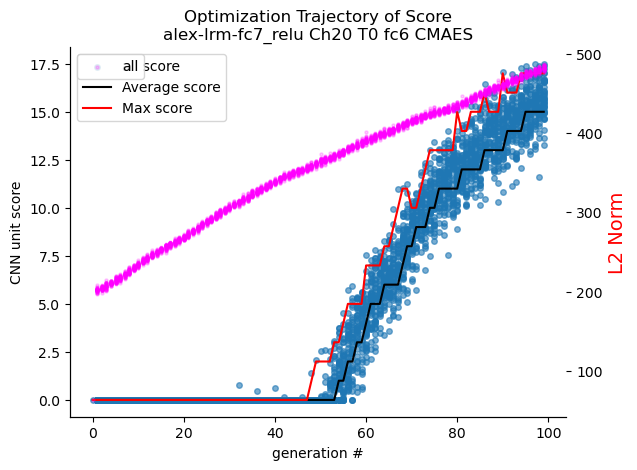

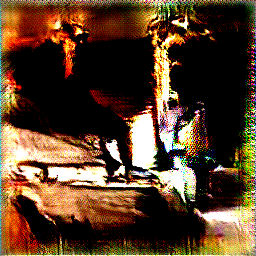

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050


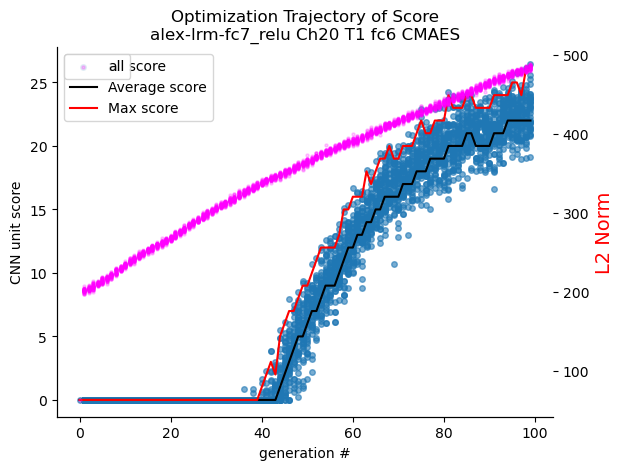

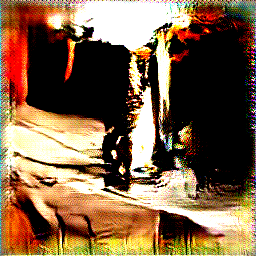

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050


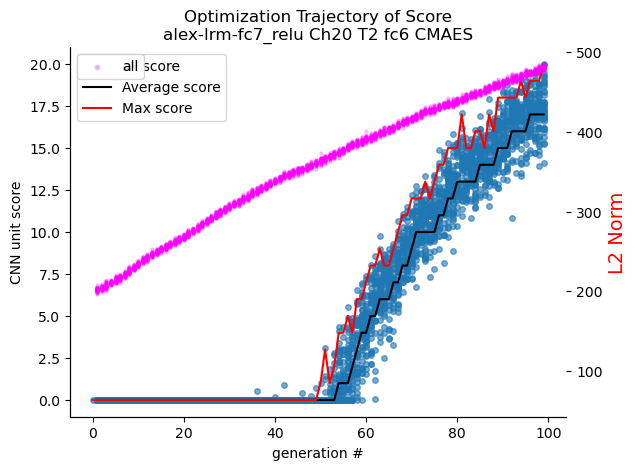

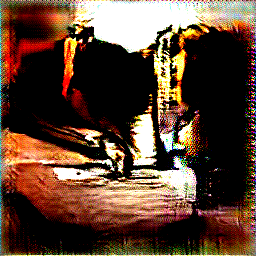

Space dimension: 256, Population size: 28, Select size:14, Optimization Parameters:
Initial sigma: 0.150
cc=0.015, cs=0.151, c1=0.000 damps=1.151


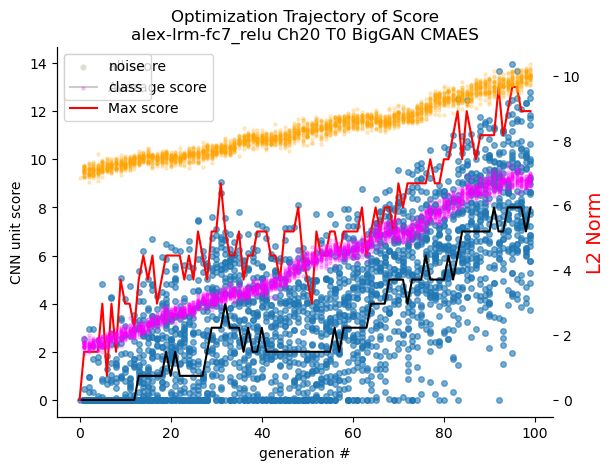

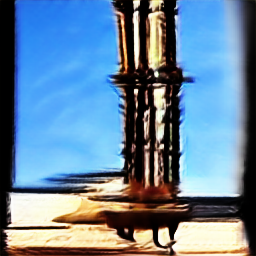

Space dimension: 256, Population size: 28, Select size:14, Optimization Parameters:
Initial sigma: 0.150
cc=0.015, cs=0.151, c1=0.000 damps=1.151


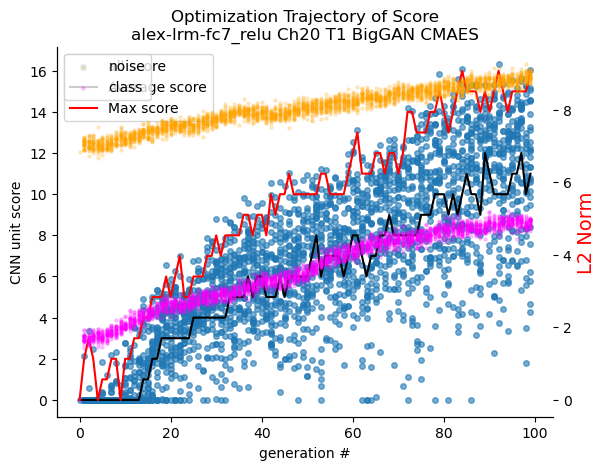

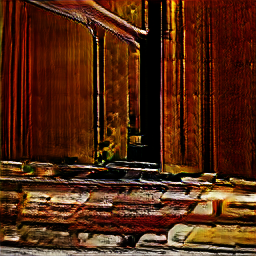

Space dimension: 256, Population size: 28, Select size:14, Optimization Parameters:
Initial sigma: 0.150
cc=0.015, cs=0.151, c1=0.000 damps=1.151


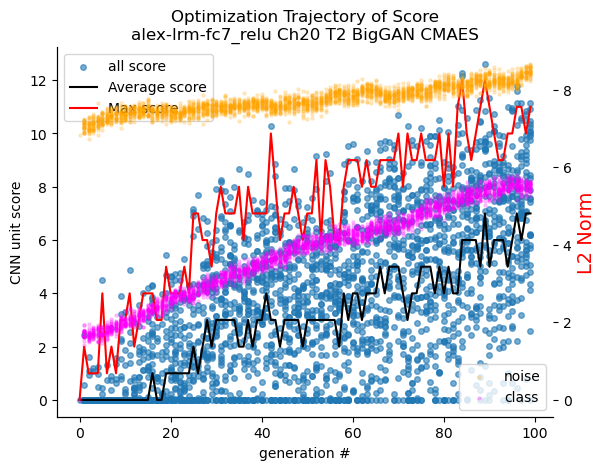

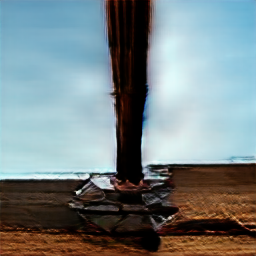

In [86]:
iChannel = 20
layerkey = "fc7_relu"
for args.G in ["fc6", "BigGAN"]:
    G = load_GAN(args.G)
    if args.G == "BigGAN":
        fixnoise = 0.7 * truncated_noise_sample(1, 128)
        init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
    elif args.G == "fc6":
        init_code = np.random.randn(1, 4096)
    
    RND = np.random.randint(100000)
    for iT in range(3):
        methodlab = f"alex-lrm-{layerkey} Ch{iChannel} T{iT} {args.G} CMAES"
        if args.G == "BigGAN":
            optimizer = CholeskyCMAES(256, init_sigma=0.15,)
        else:
            optimizer = CholeskyCMAES(init_code.shape[1], init_sigma=3,)
        np.random.seed(RND)
        new_codes = init_code.copy()
        # new_codes = init_code + np.random.randn(25, 256) * 0.06
        scores_all = []
        generations = []
        codes_all = []
        best_imgs = []
        for i in range(args.steps,):
            codes_all.append(new_codes.copy())
            latent_code = torch.from_numpy(np.array(new_codes)).float()
            # imgs = G.visualize_batch_np(new_codes) # B=1
            imgs = G.visualize(latent_code.cuda())
            if args.RFresize:
                imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
            imgs.to("cuda")
            # scores = scorer.score_tsr(imgs)
            model(imgs, drop_state=True, forward_passes=1)
            for iforward in range(0, iT):
                model(imgs, drop_state=False, forward_passes=1)
            scores = fetcher[layerkey][:, iChannel].cpu().detach().numpy()
            # if args.G == "BigGAN":
            #     print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
            #         i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
            #         latent_code[:, :128].norm(dim=1).mean()))
            # else:
            #     print("step %d score %.3f (%.3f) (norm %.2f )" % (
            #         i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
            new_codes = optimizer.step_simple(scores, new_codes, verbosity=0)
            scores_all.extend(list(scores))
            generations.extend([i] * len(scores))
            best_imgs.append(imgs[scores.argmax(),:,:,:])

        codes_all = np.concatenate(tuple(codes_all), axis=0)
        scores_all = np.array(scores_all)
        generations = np.array(generations)
        mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
        mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
        mtg = ToPILImage()(make_grid(imgs, nrow=7))
        mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
        # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
        # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
        if args.G == "fc6":
            np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                generations=generations, scores_all=scores_all, codes_fin=codes_all[-80:, :])
        else:
            np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                generations=generations, scores_all=scores_all, codes_all=codes_all)
        figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=True)
        figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )
        display(ToPILImage()(make_grid(best_imgs[-1], nrow=1)))
        # display(mtg)
        

### Massive Production

In [15]:
saveroot = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/Projects/Evol_lrm_GAN_cmp"

In [92]:
model, transforms = torch.hub.load('harvard-visionlab/lrm-steering', 'alexnet_lrm3', pretrained=True, steering=True, force_reload=True)

# fetcher.record(".feedforward.classifier.ReLU2",store_name="fc6_relu")

Downloading: "https://github.com/harvard-visionlab/lrm-steering/zipball/main" to /n/holylabs/LABS/kempner_fellows/Users/binxuwang/torch_cache/hub/main.zip


==> Loading weights for alexnet_lrm3, hash_id=63ab1b3b06
https://s3.us-east-1.wasabisys.com/visionlab-projects/dnn_feedback_dev/logs/set15/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps/28453e80-c5e5-4d76-bc81-99c5fade39ff/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
local_filename: /n/holylabs/LABS/kempner_fellows/Users/binxuwang/torch_cache/hub/set15_alexnet_torchvision_imagenet1k_lrm_3back_2steps_final_weights-63ab1b3b06.pth
<All keys matched successfully>


In [127]:
iChannel = 20
layerkey = "fc7_relu"
fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
                         print_module=False, store_device="cpu", )
fetcher.record(".feedforward.classifier.ReLU5",store_name="fc7_relu")
max_forward = 4 
for iChannel in range(25):
    savedir = join(saveroot, f"alexnet_lrm3-{layerkey}-Ch{iChannel:04d}")
    os.makedirs(savedir, exist_ok=True)
    for args.G in ["fc6", "BigGAN"]:
        G = load_GAN(args.G)
        if args.G == "BigGAN":
            fixnoise = 0.7 * truncated_noise_sample(1, 128)
            init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
        elif args.G == "fc6":
            init_code = np.random.randn(1, 4096)
        
        for trial in range(5):
            RND = np.random.randint(100000)
            for iT in range(max_forward):
                print (f"{layerkey} Ch{iChannel} T{iT} | Trial {trial} GAN {args.G} CMAES")
                methodlab = f"{args.G}_CMAES_T{iT}" # alex-lrm3-{layerkey}_Ch{iChannel}_T{iT}_
                if args.G == "BigGAN":
                    optimizer = CholeskyCMAES(256, init_sigma=0.2,)
                else:
                    optimizer = CholeskyCMAES(init_code.shape[1], init_sigma=3,)
                np.random.seed(RND)
                new_codes = init_code.copy()
                # new_codes = init_code + np.random.randn(25, 256) * 0.06
                scores_all = []
                scores_dyn_all = []
                generations = []
                codes_all = []
                best_imgs = []
                for i in range(args.steps,):
                    codes_all.append(new_codes.copy())
                    latent_code = torch.from_numpy(np.array(new_codes)).float()
                    # imgs = G.visualize_batch_np(new_codes) # B=1
                    imgs = G.visualize(latent_code.cuda())
                    if args.RFresize:
                        imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
                    imgs.to("cuda")
                    # scores = scorer.score_tsr(imgs)
                    scores_dyn = []
                    with torch.no_grad():
                        model(imgs, drop_state=True, forward_passes=1)
                        scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                        for iforward in range(0, max_forward - 1):
                            model(imgs, drop_state=False, forward_passes=1)
                            scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                    scores = scores_dyn[iT]
                    # raise ValueError("Not implemented")
                    scores_dyn = np.stack(scores_dyn, axis=1)
                    
                    new_codes = optimizer.step_simple(scores, new_codes, verbosity=0)
                    scores_all.extend(list(scores))
                    scores_dyn_all.extend(list(scores_dyn))
                    generations.extend([i] * len(scores))
                    best_imgs.append(imgs[scores.argmax(),:,:,:])
                
                if args.G == "BigGAN":
                    print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
                        i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
                        latent_code[:, :128].norm(dim=1).mean()))
                else:
                    print("step %d score %.3f (%.3f) (norm %.2f )" % (
                        i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
                codes_all = np.concatenate(tuple(codes_all), axis=0)
                scores_all = np.array(scores_all)
                scores_dyn_all = np.array(scores_dyn_all)
                generations = np.array(generations)
                mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
                mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
                mtg = ToPILImage()(make_grid(imgs, nrow=7))
                mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
                # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
                # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
                if args.G == "fc6":
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_fin=codes_all[-80:, :])
                else:
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_all=codes_all)
                figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=False)
                figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )
                # display(ToPILImage()(make_grid(best_imgs[-1], nrow=1)))
                # display(mtg)
        

fc7_relu Ch0 T0 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 30.531 (1.317) (norm 491.80 )
fc7_relu Ch0 T1 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 30.758 (1.249) (norm 493.69 )
fc7_relu Ch0 T2 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 27.751 (1.401) (norm 477.26 )
fc7_relu Ch0 T3 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 29.724 (1.528) (norm 488.35 )
fc7_relu Ch0 T0 | Trial 1 GAN fc6 CMAES
Space dimension: 4096, Population si

In [16]:
iChannel = 20
layerkey = "fc8"
fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
                         print_module=False, store_device="cpu", )
fetcher.record(".feedforward.classifier.Linear6",store_name="fc8")
max_forward = 4 
for iChannel in range(25):
    savedir = join(saveroot, f"alexnet_lrm3-{layerkey}-Ch{iChannel:04d}")
    os.makedirs(savedir, exist_ok=True)
    for args.G in ["fc6", "BigGAN"]:
        G = load_GAN(args.G)
        if args.G == "BigGAN":
            fixnoise = 0.7 * truncated_noise_sample(1, 128)
            init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
        elif args.G == "fc6":
            init_code = np.random.randn(1, 4096)
        
        for trial in range(5):
            RND = np.random.randint(100000)
            for iT in range(max_forward):
                print (f"{layerkey} Ch{iChannel} T{iT} | Trial {trial} GAN {args.G} CMAES")
                methodlab = f"{args.G}_CMAES_T{iT}" # alex-lrm3-{layerkey}_Ch{iChannel}_T{iT}_
                if args.G == "BigGAN":
                    optimizer = CholeskyCMAES(256, init_sigma=0.2,)
                else:
                    optimizer = CholeskyCMAES(init_code.shape[1], init_sigma=3,)
                np.random.seed(RND)
                new_codes = init_code.copy()
                # new_codes = init_code + np.random.randn(25, 256) * 0.06
                scores_all = []
                scores_dyn_all = []
                generations = []
                codes_all = []
                best_imgs = []
                for i in range(args.steps,):
                    codes_all.append(new_codes.copy())
                    latent_code = torch.from_numpy(np.array(new_codes)).float()
                    # imgs = G.visualize_batch_np(new_codes) # B=1
                    imgs = G.visualize(latent_code.cuda())
                    if args.RFresize:
                        imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
                    imgs.to("cuda")
                    # scores = scorer.score_tsr(imgs)
                    scores_dyn = []
                    with torch.no_grad():
                        model(imgs, drop_state=True, forward_passes=1)
                        scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                        for iforward in range(0, max_forward - 1):
                            model(imgs, drop_state=False, forward_passes=1)
                            scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                    scores = scores_dyn[iT]
                    # raise ValueError("Not implemented")
                    scores_dyn = np.stack(scores_dyn, axis=1)
                    
                    new_codes = optimizer.step_simple(scores, new_codes, verbosity=0)
                    scores_all.extend(list(scores))
                    scores_dyn_all.extend(list(scores_dyn))
                    generations.extend([i] * len(scores))
                    best_imgs.append(imgs[scores.argmax(),:,:,:])
                
                if args.G == "BigGAN":
                    print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
                        i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
                        latent_code[:, :128].norm(dim=1).mean()))
                else:
                    print("step %d score %.3f (%.3f) (norm %.2f )" % (
                        i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
                codes_all = np.concatenate(tuple(codes_all), axis=0)
                scores_all = np.array(scores_all)
                scores_dyn_all = np.array(scores_dyn_all)
                generations = np.array(generations)
                mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
                mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
                mtg = ToPILImage()(make_grid(imgs, nrow=7))
                mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
                # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
                # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
                if args.G == "fc6":
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_fin=codes_all[-80:, :])
                else:
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_all=codes_all)
                figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=False)
                figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )
                # display(ToPILImage()(make_grid(best_imgs[-1], nrow=1)))
                # display(mtg)
        

fc8 Ch0 T0 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 15.811 (0.821) (norm 485.58 )
fc8 Ch0 T1 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 17.082 (1.036) (norm 486.11 )
fc8 Ch0 T2 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 15.357 (0.826) (norm 488.11 )
fc8 Ch0 T3 | Trial 0 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 14.737 (0.826) (norm 484.34 )
fc8 Ch0 T0 | Trial 1 GAN fc6 CMAES
Space dimension: 4096, Population size: 40, Select size:20, O

In [17]:
iChannel = 20
layerkey = "fc6_relu"
fetcher = featureFetcher(model,  input_size=(3, 224, 224), device="cuda", 
                         print_module=False, store_device="cpu", )
fetcher.record(".feedforward.classifier.ReLU2",store_name="fc6_relu")
max_forward = 4 
for iChannel in range(25):
    savedir = join(saveroot, f"alexnet_lrm3-{layerkey}-Ch{iChannel:04d}")
    os.makedirs(savedir, exist_ok=True)
    for args.G in ["fc6", "BigGAN"]:
        G = load_GAN(args.G)
        if args.G == "BigGAN":
            fixnoise = 0.7 * truncated_noise_sample(1, 128)
            init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
        elif args.G == "fc6":
            init_code = np.random.randn(1, 4096)
        
        for trial in range(5):
            RND = np.random.randint(100000)
            for iT in range(max_forward):
                print (f"{layerkey} Ch{iChannel} T{iT} | GAN {args.G} CMAES Trial | {trial}")
                methodlab = f"{args.G}_CMAES_T{iT}" # alex-lrm3-{layerkey}_Ch{iChannel}_T{iT}_
                if args.G == "BigGAN":
                    optimizer = CholeskyCMAES(256, init_sigma=0.2,)
                else:
                    optimizer = CholeskyCMAES(init_code.shape[1], init_sigma=3,)
                np.random.seed(RND)
                new_codes = init_code.copy()
                # new_codes = init_code + np.random.randn(25, 256) * 0.06
                scores_all = []
                scores_dyn_all = []
                generations = []
                codes_all = []
                best_imgs = []
                for i in range(args.steps,):
                    codes_all.append(new_codes.copy())
                    latent_code = torch.from_numpy(np.array(new_codes)).float()
                    # imgs = G.visualize_batch_np(new_codes) # B=1
                    imgs = G.visualize(latent_code.cuda())
                    if args.RFresize:
                        imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
                    imgs.to("cuda")
                    # scores = scorer.score_tsr(imgs)
                    scores_dyn = []
                    with torch.no_grad():
                        model(imgs, drop_state=True, forward_passes=1)
                        scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                        for iforward in range(0, max_forward - 1):
                            model(imgs, drop_state=False, forward_passes=1)
                            scores_dyn.append(fetcher[layerkey][:, iChannel].cpu().detach().numpy())
                    scores = scores_dyn[iT]
                    # raise ValueError("Not implemented")
                    scores_dyn = np.stack(scores_dyn, axis=1)
                    
                    new_codes = optimizer.step_simple(scores, new_codes, verbosity=0)
                    scores_all.extend(list(scores))
                    scores_dyn_all.extend(list(scores_dyn))
                    generations.extend([i] * len(scores))
                    best_imgs.append(imgs[scores.argmax(),:,:,:])
                
                if args.G == "BigGAN":
                    print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
                        i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
                        latent_code[:, :128].norm(dim=1).mean()))
                else:
                    print("step %d score %.3f (%.3f) (norm %.2f )" % (
                        i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
                codes_all = np.concatenate(tuple(codes_all), axis=0)
                scores_all = np.array(scores_all)
                scores_dyn_all = np.array(scores_dyn_all)
                generations = np.array(generations)
                mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
                mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
                mtg = ToPILImage()(make_grid(imgs, nrow=7))
                mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
                # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
                # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
                if args.G == "fc6":
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_fin=codes_all[-80:, :])
                else:
                    np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
                        generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_all=codes_all)
                figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=False)
                figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )
                # display(ToPILImage()(make_grid(best_imgs[-1], nrow=1)))
                # display(mtg)
        

fc6_relu Ch0 T0 | GAN fc6 CMAES Trial | 0
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 38.861 (1.701) (norm 469.81 )
fc6_relu Ch0 T1 | GAN fc6 CMAES Trial | 0
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 37.058 (1.765) (norm 473.97 )
fc6_relu Ch0 T2 | GAN fc6 CMAES Trial | 0
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 39.699 (1.903) (norm 483.42 )
fc6_relu Ch0 T3 | GAN fc6 CMAES Trial | 0
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 99 score 39.828 (1.958) (norm 484.88 )
fc6_relu Ch0 T0 | GAN fc6 CMAES Trial | 1
Space dimension: 4096, Pop

### Synopsis of Results

/n/home12/binxuwang/.conda/envs/torch/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/n/home12/binxuwang/.conda/envs/torch/lib/python3.10/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


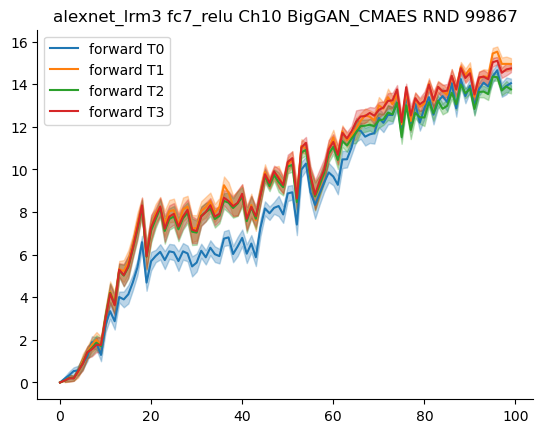

ValueError: Not implemented

In [126]:
import re
import glob
for iChannel in [10]: #range(25):
    savedir = join(saveroot, f"alexnet_lrm3-{layerkey}-Ch{iChannel:04d}")
    npzfiles = glob.glob(join(savedir, "scores*.npz"))
    for GANname in ["BigGAN", "fc6", ]:
        methodlab = f"{GANname}_CMAES"
        # search for files with the naming "scores%s_%05d.npz" % (methodlab, RND)
        pattern = re.compile(r"scores%s_(\d+).npz" % (methodlab,))
        npzfile_GAN = [f for f in npzfiles if pattern.search(f)]
        for npzfile in npzfile_GAN:
            RND = int(pattern.search(npzfile).group(1))
            title_str = f"alexnet_lrm3 {layerkey} Ch{iChannel} {methodlab} RND {RND}"
            data = np.load(npzfile)
            generations = data["generations"]
            scores_all = data["scores_all"]
            scores_dyn_all = data["scores_dyn_all"]
            gen_slice, mean_score, sem_score, max_score = group_stats_by_gen(generations, scores_dyn_all)
            for i in range(4):
                shaded_errorbar(gen_slice, mean_score[:,i], sem_score[:,i], 
                                label=f"forward T{i}", color=f"C{i}")
            plt.legend()
            plt.title(title_str)
            plt.show()
            raise ValueError("Not implemented")
        # data = np.load(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)))
    # np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
    #     generations=generations, scores_all=scores_all, scores_dyn_all=scores_dyn_all, codes_fin=codes_all[-80:, :])
                

In [124]:
from scipy.stats import sem
from core.utils.stats_utils import shaded_errorbar

def group_stats_by_gen(generations, value, funcs=[np.mean, sem]):
    gen_slice = np.arange(min(generations), max(generations) + 1)
    mean_score = np.zeros((gen_slice.shape[0], value.shape[1]))
    sem_score = np.zeros((gen_slice.shape[0], value.shape[1]))
    max_score = np.zeros((gen_slice.shape[0], value.shape[1]))
    for i, geni in enumerate(gen_slice):
        mean_score[i, :] = np.mean(value[generations == geni], axis=0)
        sem_score[i, :] = sem(value[generations == geni], axis=0)
        max_score[i, :] = np.max(value[generations == geni])
    return gen_slice, mean_score, sem_score, max_score



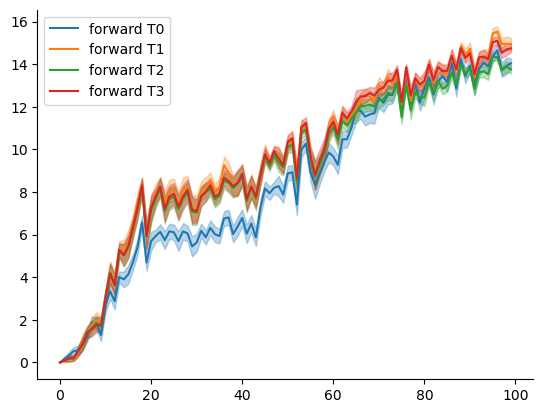

In [125]:
gen_slice, mean_score, sem_score, max_score = group_stats_by_gen(generations, scores_dyn_all)
for i in range(4):
    shaded_errorbar(gen_slice, mean_score[:,i], sem_score[:,i], 
                    label=f"forward T{i}", color=f"C{i}")
plt.legend()
plt.show()

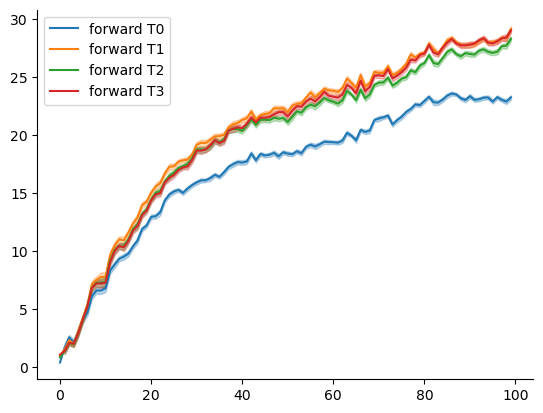

In [120]:
gen_slice, mean_score, sem_score, max_score = group_stats_by_gen(generations, scores_dyn_all)
for i in range(4):
    shaded_errorbar(gen_slice, mean_score[:,i], sem_score[:,i], 
                    label=f"forward T{i}", color=f"C{i}")
plt.legend()
plt.show()

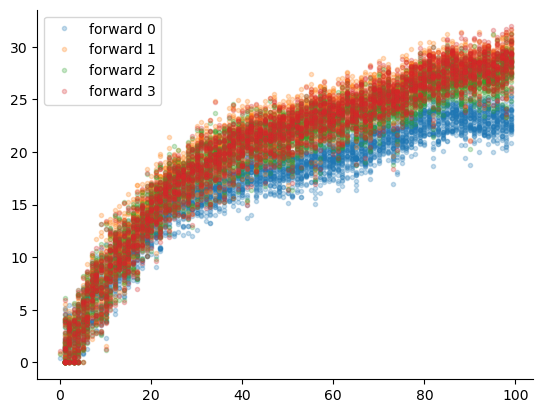

In [114]:
plt.Figure()
for iT in range(4):
    plt.plot(generations, scores_dyn_all[:, iT], ".", alpha=0.25, label=f"forward {iT}")
plt.legend()
plt.show()

In [ ]:
args.G = "BigGAN"
G = load_GAN(args.G)
iChannel = 10
T_max = 4
RND = np.random.randint(100000)
np.random.seed(RND)
if args.G == "BigGAN":
    fixnoise = 0.7 * truncated_noise_sample(1, 128)
    init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
elif args.G == "fc6":
    init_code = np.random.randn(1, 4096)
for iT in range(T_max):
    optimizer = CholeskyCMAES(init_code.shape[1])
    new_codes = init_code.copy()
    scores_all = []
    generations = []
    codes_all = []
    best_imgs = []
    for i in range(args.steps,):
        codes_all.append(new_codes.copy())
        latent_code = torch.from_numpy(np.array(new_codes)).float()
        # imgs = G.visualize_batch_np(new_codes) # B=1
        imgs = G.visualize(latent_code.cuda())
        if args.RFresize:
            imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
        imgs.to("cuda")
        # scores = scorer.score_tsr(imgs)
        model(imgs, drop_state=True, forward_passes=1)
        for iforward in range(0, iT):
            model(imgs, drop_state=False, forward_passes=1)
        scores = fetcher["fc6_relu"][:, iChannel].cpu().detach().numpy()
        # if args.G == "BigGAN":
        #     print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
        #         i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
        #         latent_code[:, :128].norm(dim=1).mean()))
        # else:
        #     print("step %d score %.3f (%.3f) (norm %.2f )" % (
        #         i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
        new_codes = optimizer.step_simple(scores, new_codes, )
        scores_all.extend(list(scores))
        generations.extend([i] * len(scores))
        best_imgs.append(imgs[scores.argmax(),:,:,:])

    codes_all = np.concatenate(tuple(codes_all), axis=0)
    scores_all = np.array(scores_all)
    generations = np.array(generations)
    mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
    mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
    mtg = ToPILImage()(make_grid(imgs, nrow=7))
    mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
    # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
    # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
    if args.G == "fc6":
        np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
            generations=generations, scores_all=scores_all, codes_fin=codes_all[-80:, :])
    else:
        np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
            generations=generations, scores_all=scores_all, codes_all=codes_all)
    figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=True)
    figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )


Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 0 score 3.436 (0.000) (norm 63.62 )
step 1 score 1.893 (1.051) (norm 202.07 )
sigma: 2.90
step 2 score 1.763 (1.043) (norm 204.41 )
sigma: 2.83
step 3 score 2.222 (1.149) (norm 208.89 )
sigma: 2.76
step 4 score 2.360 (1.016) (norm 212.31 )
sigma: 2.71
step 5 score 3.152 (0.925) (norm 217.04 )
sigma: 2.67
step 6 score 3.460 (1.082) (norm 219.90 )
sigma: 2.63
step 7 score 3.844 (1.029) (norm 224.56 )
sigma: 2.59
step 8 score 4.166 (1.034) (norm 228.98 )
sigma: 2.56
step 9 score 4.467 (0.833) (norm 232.88 )
sigma: 2.54
step 10 score 4.778 (0.821) (norm 236.36 )
sigma: 2.51
step 11 score 5.330 (1.219) (norm 240.68 )
sigma: 2.49
A, Ainv update! Time cost: 0.23 s
step 12 score 5.937 (1.213) (norm 245.64 )
sigma: 2.48
step 13 score 6.197 (1.041) (norm 248.94 )
sigma: 2.46
step 14 score 6.689 (1.044) (norm 253.81 )
sigma: 2.45
step 15 score 7.1

A, Ainv update! Time cost: 0.24 s
step 23 score 9.605 (1.162) (norm 287.34 )
sigma: 2.38
step 24 score 10.001 (0.905) (norm 290.49 )
sigma: 2.38
step 25 score 9.863 (0.966) (norm 294.72 )
sigma: 2.38
step 26 score 10.235 (1.040) (norm 298.28 )
sigma: 2.37
step 27 score 10.574 (0.952) (norm 300.64 )
sigma: 2.37
step 28 score 10.672 (1.034) (norm 303.73 )
sigma: 2.37
step 29 score 10.912 (1.272) (norm 307.05 )
sigma: 2.37
step 30 score 11.359 (1.213) (norm 310.08 )
sigma: 2.36
step 31 score 11.703 (1.076) (norm 312.95 )
sigma: 2.36
step 32 score 12.032 (1.278) (norm 315.55 )
sigma: 2.36
step 33 score 12.569 (1.169) (norm 318.81 )
sigma: 2.36
A, Ainv update! Time cost: 0.23 s
step 34 score 13.042 (0.980) (norm 322.25 )
sigma: 2.35
step 35 score 13.499 (1.335) (norm 325.24 )
sigma: 2.35
step 36 score 13.884 (1.089) (norm 328.11 )
sigma: 2.35
step 37 score 14.412 (1.272) (norm 332.51 )
sigma: 2.35
step 38 score 14.712 (1.199) (norm 335.67 )
sigma: 2.35
step 39 score 15.305 (1.209) (norm 339

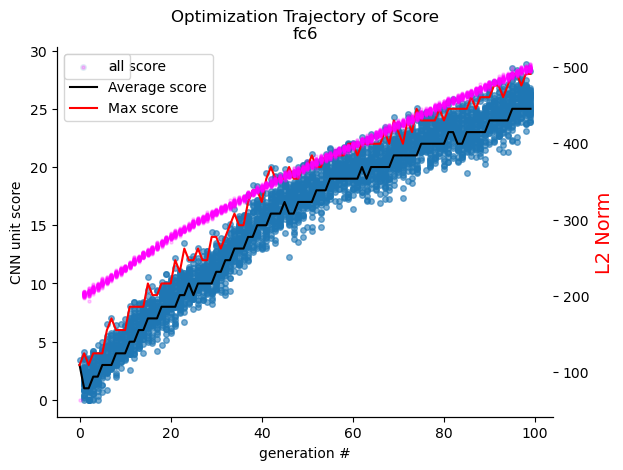

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 0 score 3.857 (0.000) (norm 63.62 )
step 1 score 2.102 (1.410) (norm 202.15 )
sigma: 2.90
step 2 score 2.763 (1.234) (norm 204.46 )
sigma: 2.83
step 3 score 3.688 (1.170) (norm 207.65 )
sigma: 2.76
step 4 score 4.099 (1.419) (norm 209.89 )
sigma: 2.71
step 5 score 4.424 (1.400) (norm 213.95 )
sigma: 2.66
step 6 score 4.851 (1.396) (norm 218.42 )
sigma: 2.62
step 7 score 5.596 (1.187) (norm 221.80 )
sigma: 2.58
step 8 score 6.360 (1.388) (norm 225.74 )
sigma: 2.55
step 9 score 6.908 (1.308) (norm 230.93 )
sigma: 2.53
step 10 score 7.115 (1.233) (norm 233.85 )
sigma: 2.50
step 11 score 6.952 (1.135) (norm 237.40 )
sigma: 2.48
A, Ainv update! Time cost: 0.23 s
step 12 score 7.412 (1.150) (norm 241.18 )
sigma: 2.46
step 13 score 7.838 (1.049) (norm 245.46 )
sigma: 2.45
step 14 score 8.142 (0.994) (norm 249.74 )
sigma: 2.43
step 15 score 8.1

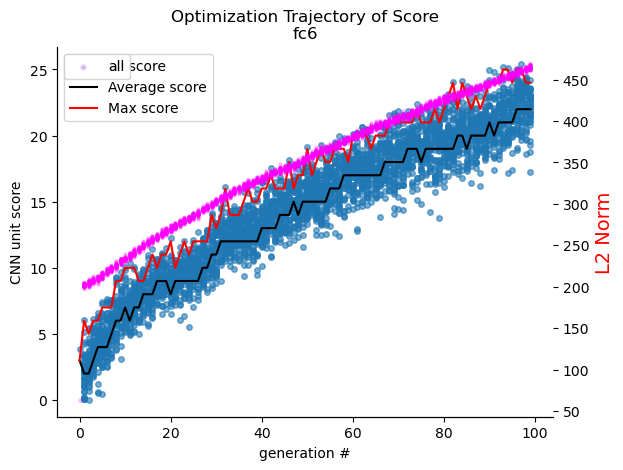

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
step 0 score 3.393 (0.000) (norm 63.62 )
step 1 score 1.408 (1.210) (norm 202.13 )
sigma: 2.90
step 2 score 2.219 (1.091) (norm 203.72 )
sigma: 2.82
step 3 score 2.478 (1.270) (norm 206.73 )
sigma: 2.76
step 4 score 3.023 (1.081) (norm 210.97 )
sigma: 2.71
step 5 score 3.287 (1.414) (norm 214.50 )
sigma: 2.66
step 6 score 4.150 (1.242) (norm 219.00 )
sigma: 2.62
step 7 score 4.838 (1.173) (norm 223.31 )
sigma: 2.59
step 8 score 5.258 (1.279) (norm 227.34 )
sigma: 2.56
step 9 score 5.942 (1.159) (norm 231.06 )
sigma: 2.53
step 10 score 6.262 (1.195) (norm 234.31 )
sigma: 2.51
step 11 score 6.652 (1.319) (norm 238.92 )
sigma: 2.48
A, Ainv update! Time cost: 0.23 s
step 12 score 7.416 (1.322) (norm 241.61 )
sigma: 2.47
step 13 score 7.744 (0.887) (norm 245.77 )
sigma: 2.45
step 14 score 7.855 (1.144) (norm 249.23 )
sigma: 2.44
step 15 score 8.5

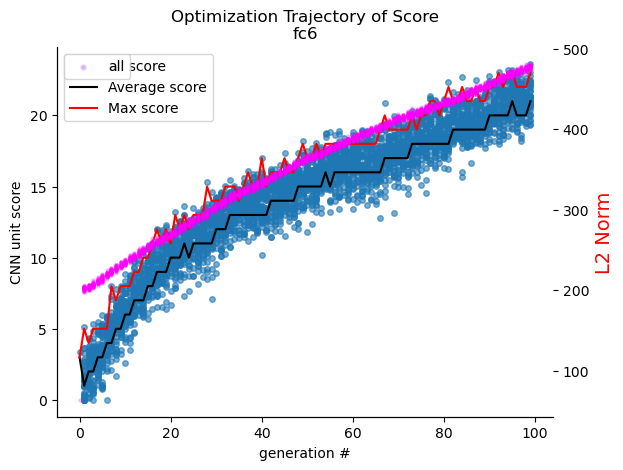

In [59]:
init_code = np.random.randn(1, 4096)
iChannel = 1
for iT in range(3):
    optimizer = CholeskyCMAES(4096)
    new_codes = init_code.copy()
    # new_codes = init_code + np.random.randn(25, 256) * 0.06
    scores_all = []
    generations = []
    codes_all = []
    best_imgs = []
    for i in range(args.steps,):
        codes_all.append(new_codes.copy())
        latent_code = torch.from_numpy(np.array(new_codes)).float()
        # imgs = G.visualize_batch_np(new_codes) # B=1
        imgs = G.visualize(latent_code.cuda())
        if args.RFresize:
            imgs = resize_and_pad(imgs, corner, imgsize)  #  Bug: imgs are resized to 256x256 and it will be further resized in score_tsr
        # scores = scorer.score_tsr(imgs)
        imgs.to("cuda")
        model(imgs, drop_state=True, forward_passes=1)
        for iforward in range(0, iT):
            model(imgs, drop_state=False, forward_passes=1)
        scores = fetcher["fc6_relu"][:, iChannel].cpu().detach().numpy()
        # raise ValueError
        if args.G == "BigGAN":
            print("step %d score %.3f (%.3f) (norm %.2f noise norm %.2f)" % (
                i, scores.mean(), scores.std(), latent_code[:, 128:].norm(dim=1).mean(),
                latent_code[:, :128].norm(dim=1).mean()))
        else:
            print("step %d score %.3f (%.3f) (norm %.2f )" % (
                i, scores.mean(), scores.std(), latent_code.norm(dim=1).mean(),))
        new_codes = optimizer.step_simple(scores, new_codes, )
        scores_all.extend(list(scores))
        generations.extend([i] * len(scores))
        best_imgs.append(imgs[scores.argmax(),:,:,:])

    codes_all = np.concatenate(tuple(codes_all), axis=0)
    scores_all = np.array(scores_all)
    generations = np.array(generations)
    mtg_exp = ToPILImage()(make_grid(best_imgs, nrow=10))
    mtg_exp.save(join(savedir, "besteachgen%s_%05d.jpg" % (methodlab, RND,)))
    mtg = ToPILImage()(make_grid(imgs, nrow=7))
    mtg.save(join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())))
    # save_imgrid(imgs, join(savedir, "lastgen%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), nrow=7)
    # save_imgrid(best_imgs, join(savedir, "bestgen%s_%05d.jpg" % (methodlab, RND, )), nrow=10)
    if args.G == "fc6":
        np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
            generations=generations, scores_all=scores_all, codes_fin=codes_all[-80:, :])
    else:
        np.savez(join(savedir, "scores%s_%05d.npz" % (methodlab, RND)),
            generations=generations, scores_all=scores_all, codes_all=codes_all)
    figh = visualize_trajectory(scores_all, generations, codes_arr=codes_all, title_str=methodlab, show=True)
    figh.savefig(join(savedir, "traj%s_%05d_score%.1f.jpg" % (methodlab, RND, scores.mean())), )
